In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import requests
import os
import lxml
import seaborn as sns

In [2]:
from Source.ScrapePlayersWages import Scrape_Wage

In [3]:
leagues = ["La_Liga", "Premier_League", 
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]
LeaguesDict = {}
LeagueDictFull = {}
for i in leagues:
    LeaguesDict[i] = Scrape_Wage(i)
    LeagueDictFull[i] = LeaguesDict[i][['Player Name', 'Weekly Wage',
                                       'Yearly Salary', 'Age', 'Team',
                                       'Position','Nationality']].copy()
    LeagueDictFull[i]["League"] = i.replace("_", " ")
    
    LeaguesDict[i] = LeaguesDict[i].sort_values('Weekly Wage',
                                                ascending = False)
    LeaguesDict[i] = LeaguesDict[i].groupby("Team").nth([i for i in range(11)]
                                                        ).reset_index()[['Player Name',
                                                                         'Weekly Wage',
                                                                         'Age', 'Team']]
    LeaguesDict[i] = LeaguesDict[i].groupby("Team")['Weekly Wage'].agg(['mean']).reset_index()
    
    LeaguesDict[i] = LeaguesDict[i].sort_values('mean', ascending = False).reset_index(drop=True)
    LeaguesDict[i] = LeaguesDict[i].set_index("Team")
    LeaguesDict[i] = LeaguesDict[i].rename(columns = {"mean":"Average Wage of top 11 Earners of each Team"})

In [11]:
# for j in leagues:
#     print("")
#     print(j)
#     print(LeaguesDict[j].head(5))
#     print("")

In [4]:
LeaguesDict.keys()

dict_keys(['La_Liga', 'Premier_League', 'Seria_A', 'Bundesliga', 'Ligue_1', 'Liga_Nos'])

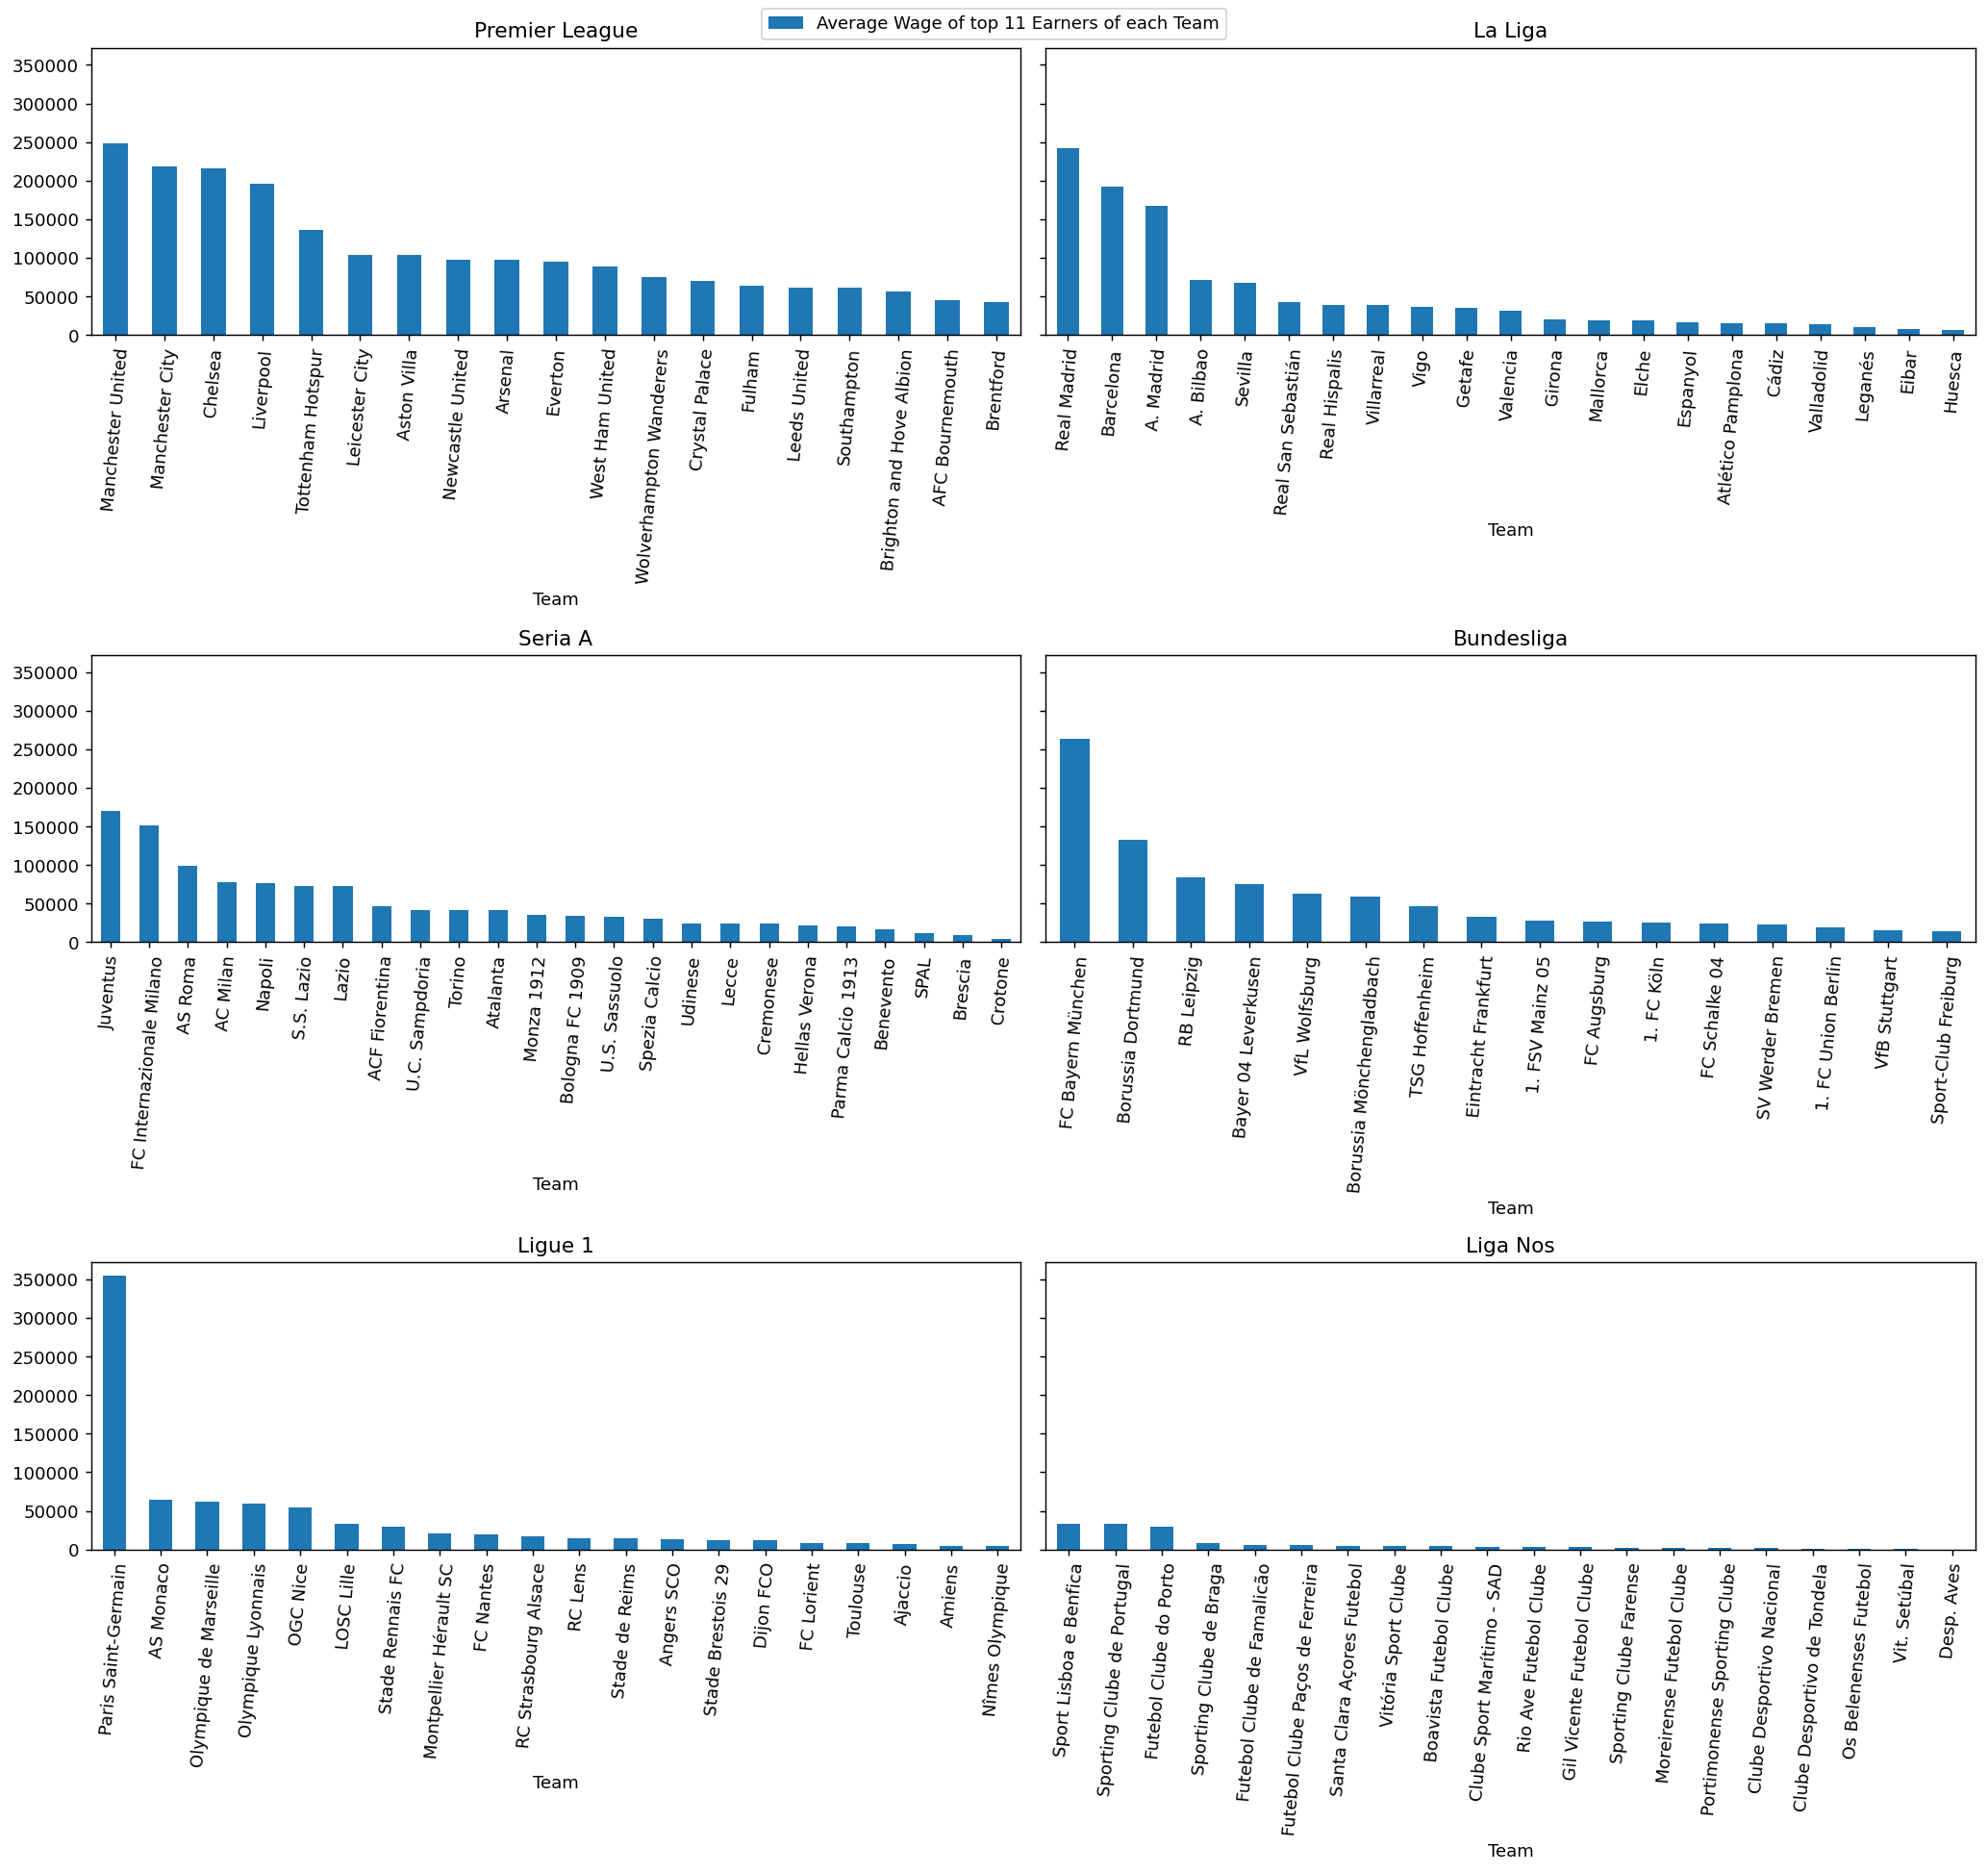

In [5]:
plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True)


axes[0, 0].set_title('Premier League')
LeaguesDict["Premier_League"].plot(ax=axes[0, 0], kind = "bar", legend=0,  rot=85)

axes[0, 1].set_title('La Liga')
LeaguesDict["La_Liga"].plot(ax=axes[0, 1], kind = "bar", legend=0,  rot=85)

axes[1, 0].set_title('Seria A')
LeaguesDict["Seria_A"].plot(ax=axes[1, 0], kind = "bar", legend=0,  rot=85)

axes[1, 1].set_title('Bundesliga')
LeaguesDict["Bundesliga"].plot(ax=axes[1, 1], kind = "bar", legend=0,  rot=85)

axes[2, 0].set_title('Ligue 1')
LeaguesDict["Ligue_1"].plot(ax=axes[2, 0], kind = "bar", legend=0,  rot=85)

axes[2, 1].set_title('Liga Nos')
LeaguesDict["Liga_Nos"].plot(ax=axes[2, 1], kind = "bar", legend=0,  rot=85)

handles, labels = axes[2,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
#plt.axis('off')

plt.show()

### PSG wages are insane

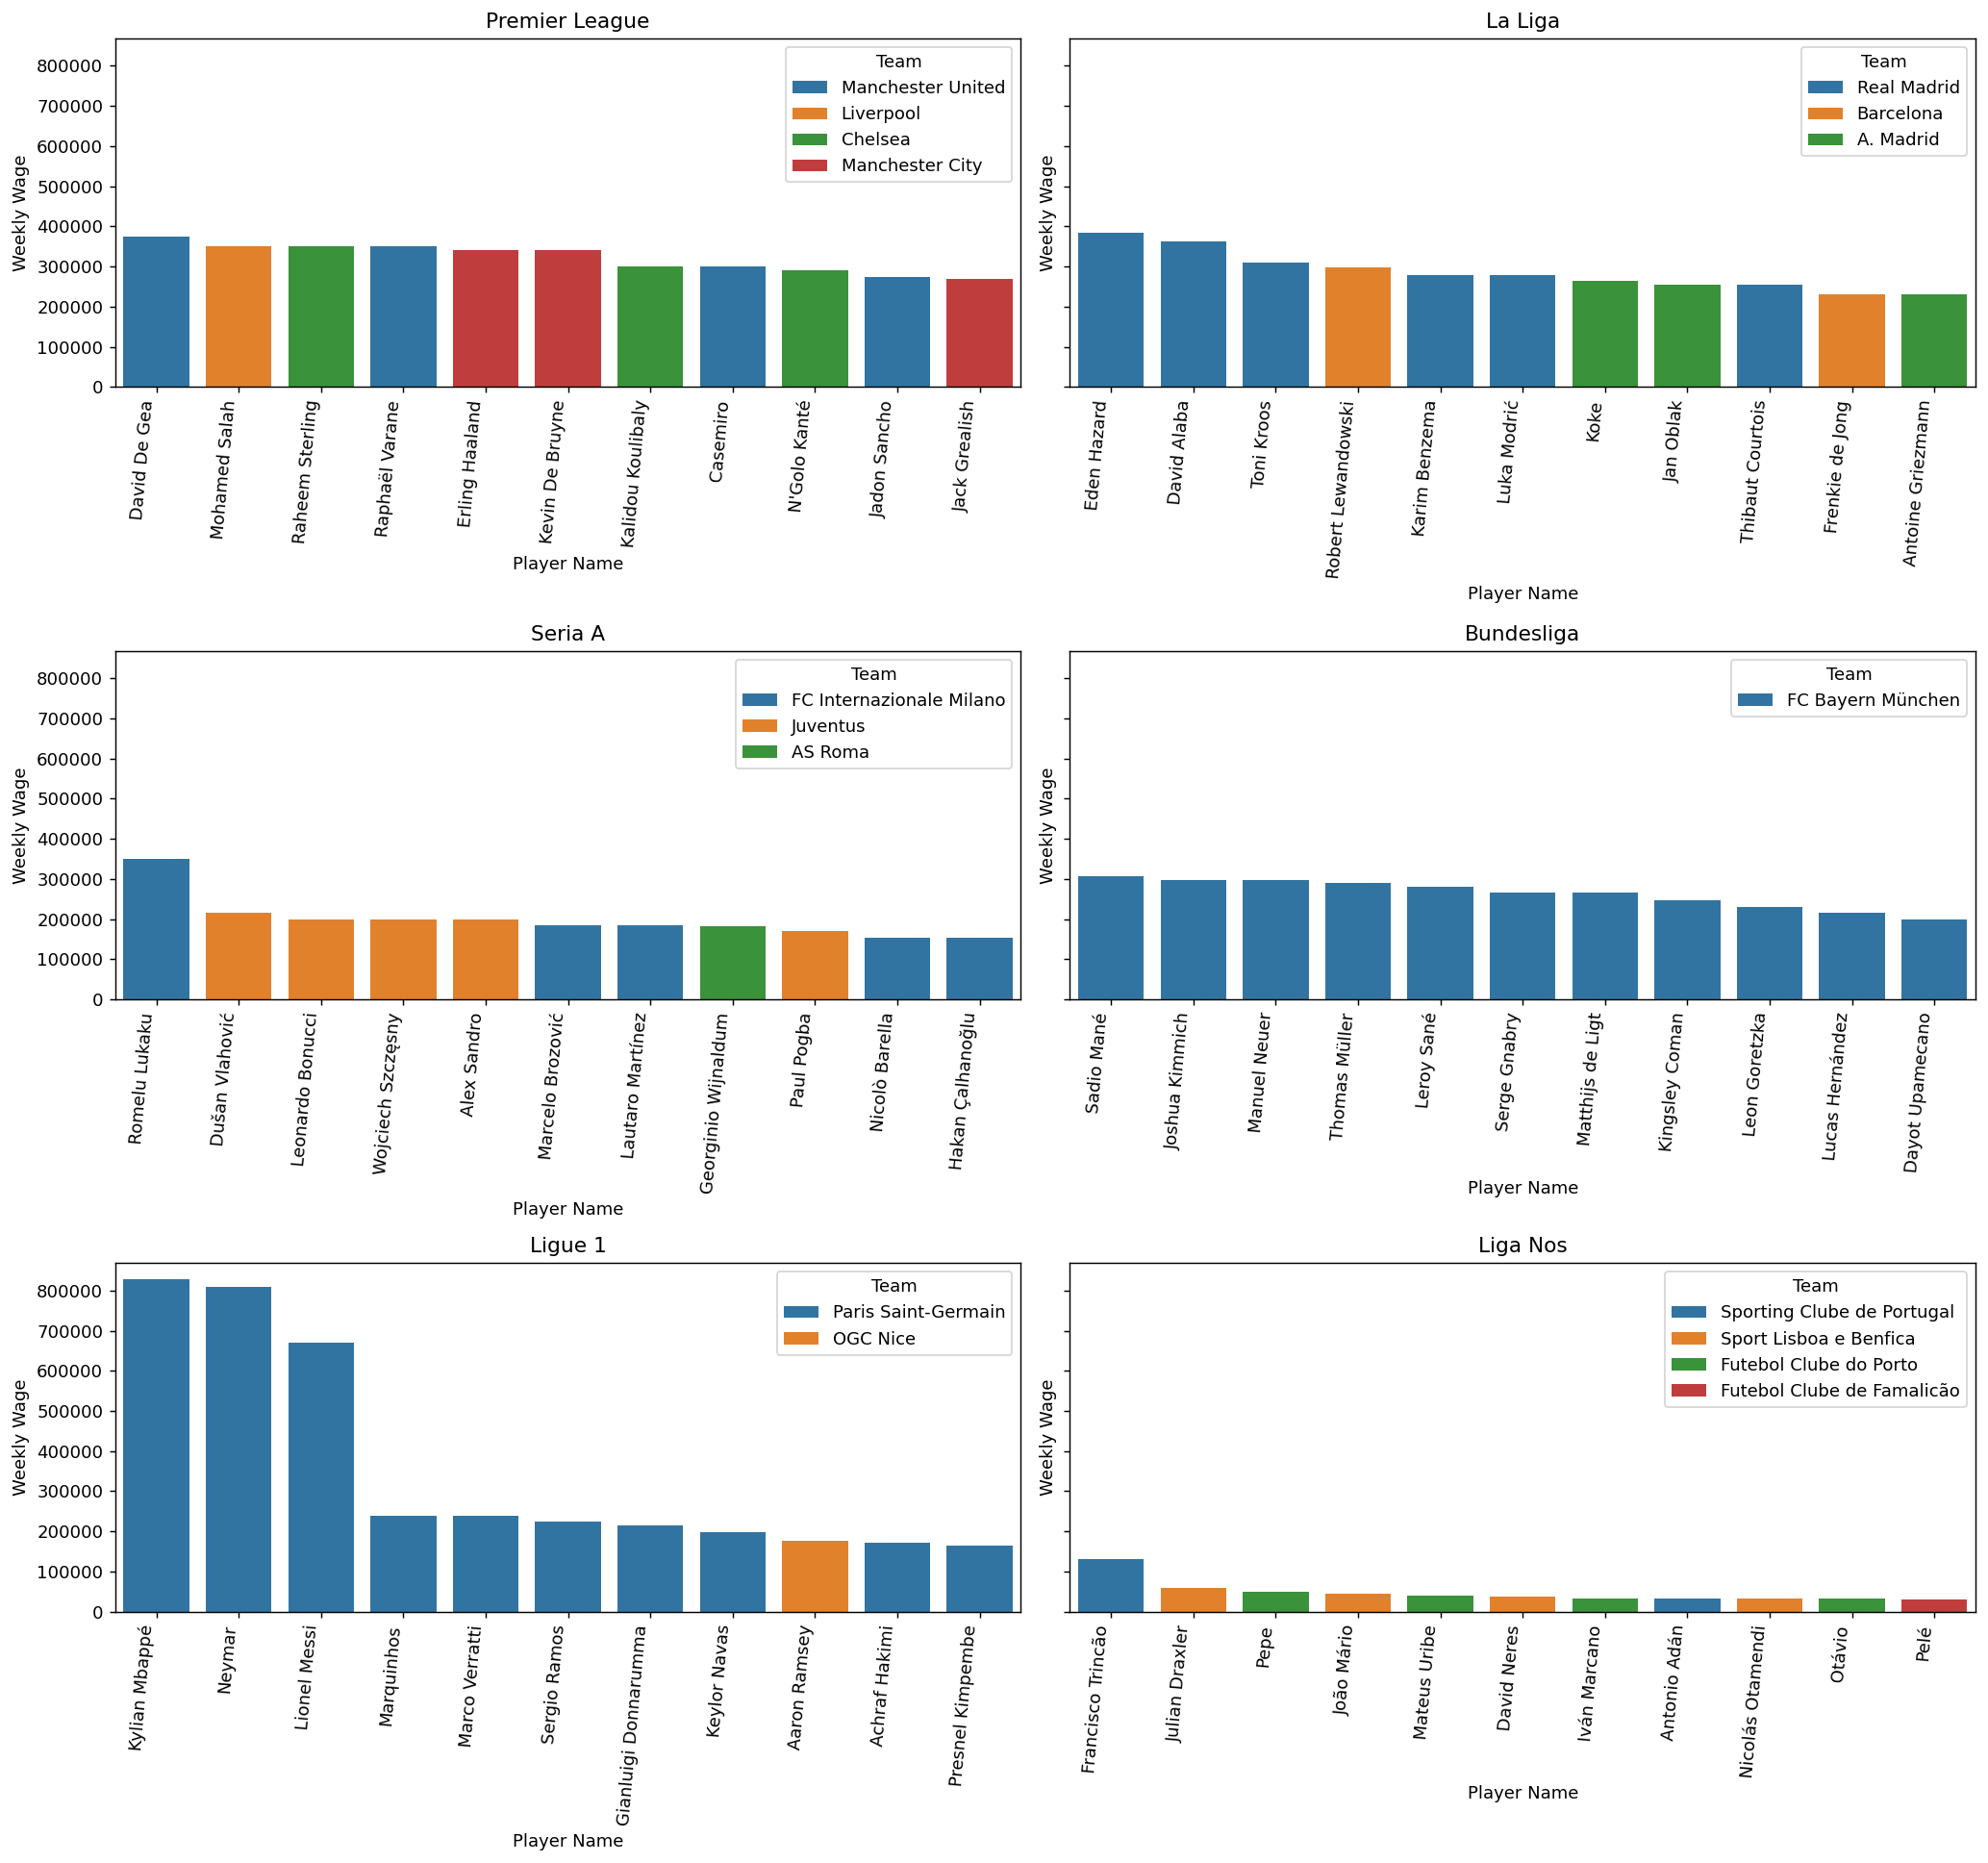

In [78]:
leagues = ["Premier_League", "La_Liga",  
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]

plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True, squeeze=False)

for d, i, j in zip(leagues, [0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]):
    df = LeagueDictFull[d].sort_values('Weekly Wage', ascending = 0).iloc[0:11]
    # sns.set(rc={'figure.figsize':(10.7,6.27)})
    
    axes[i, j].set_title(d.replace("_", " "))
    sns.barplot(x='Player Name', y='Weekly Wage', 
                          data=df, hue='Team', dodge=False,
                         ax = axes[i,j])
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), 
                              rotation=85, 
                              horizontalalignment='right')
    

plt.tight_layout()

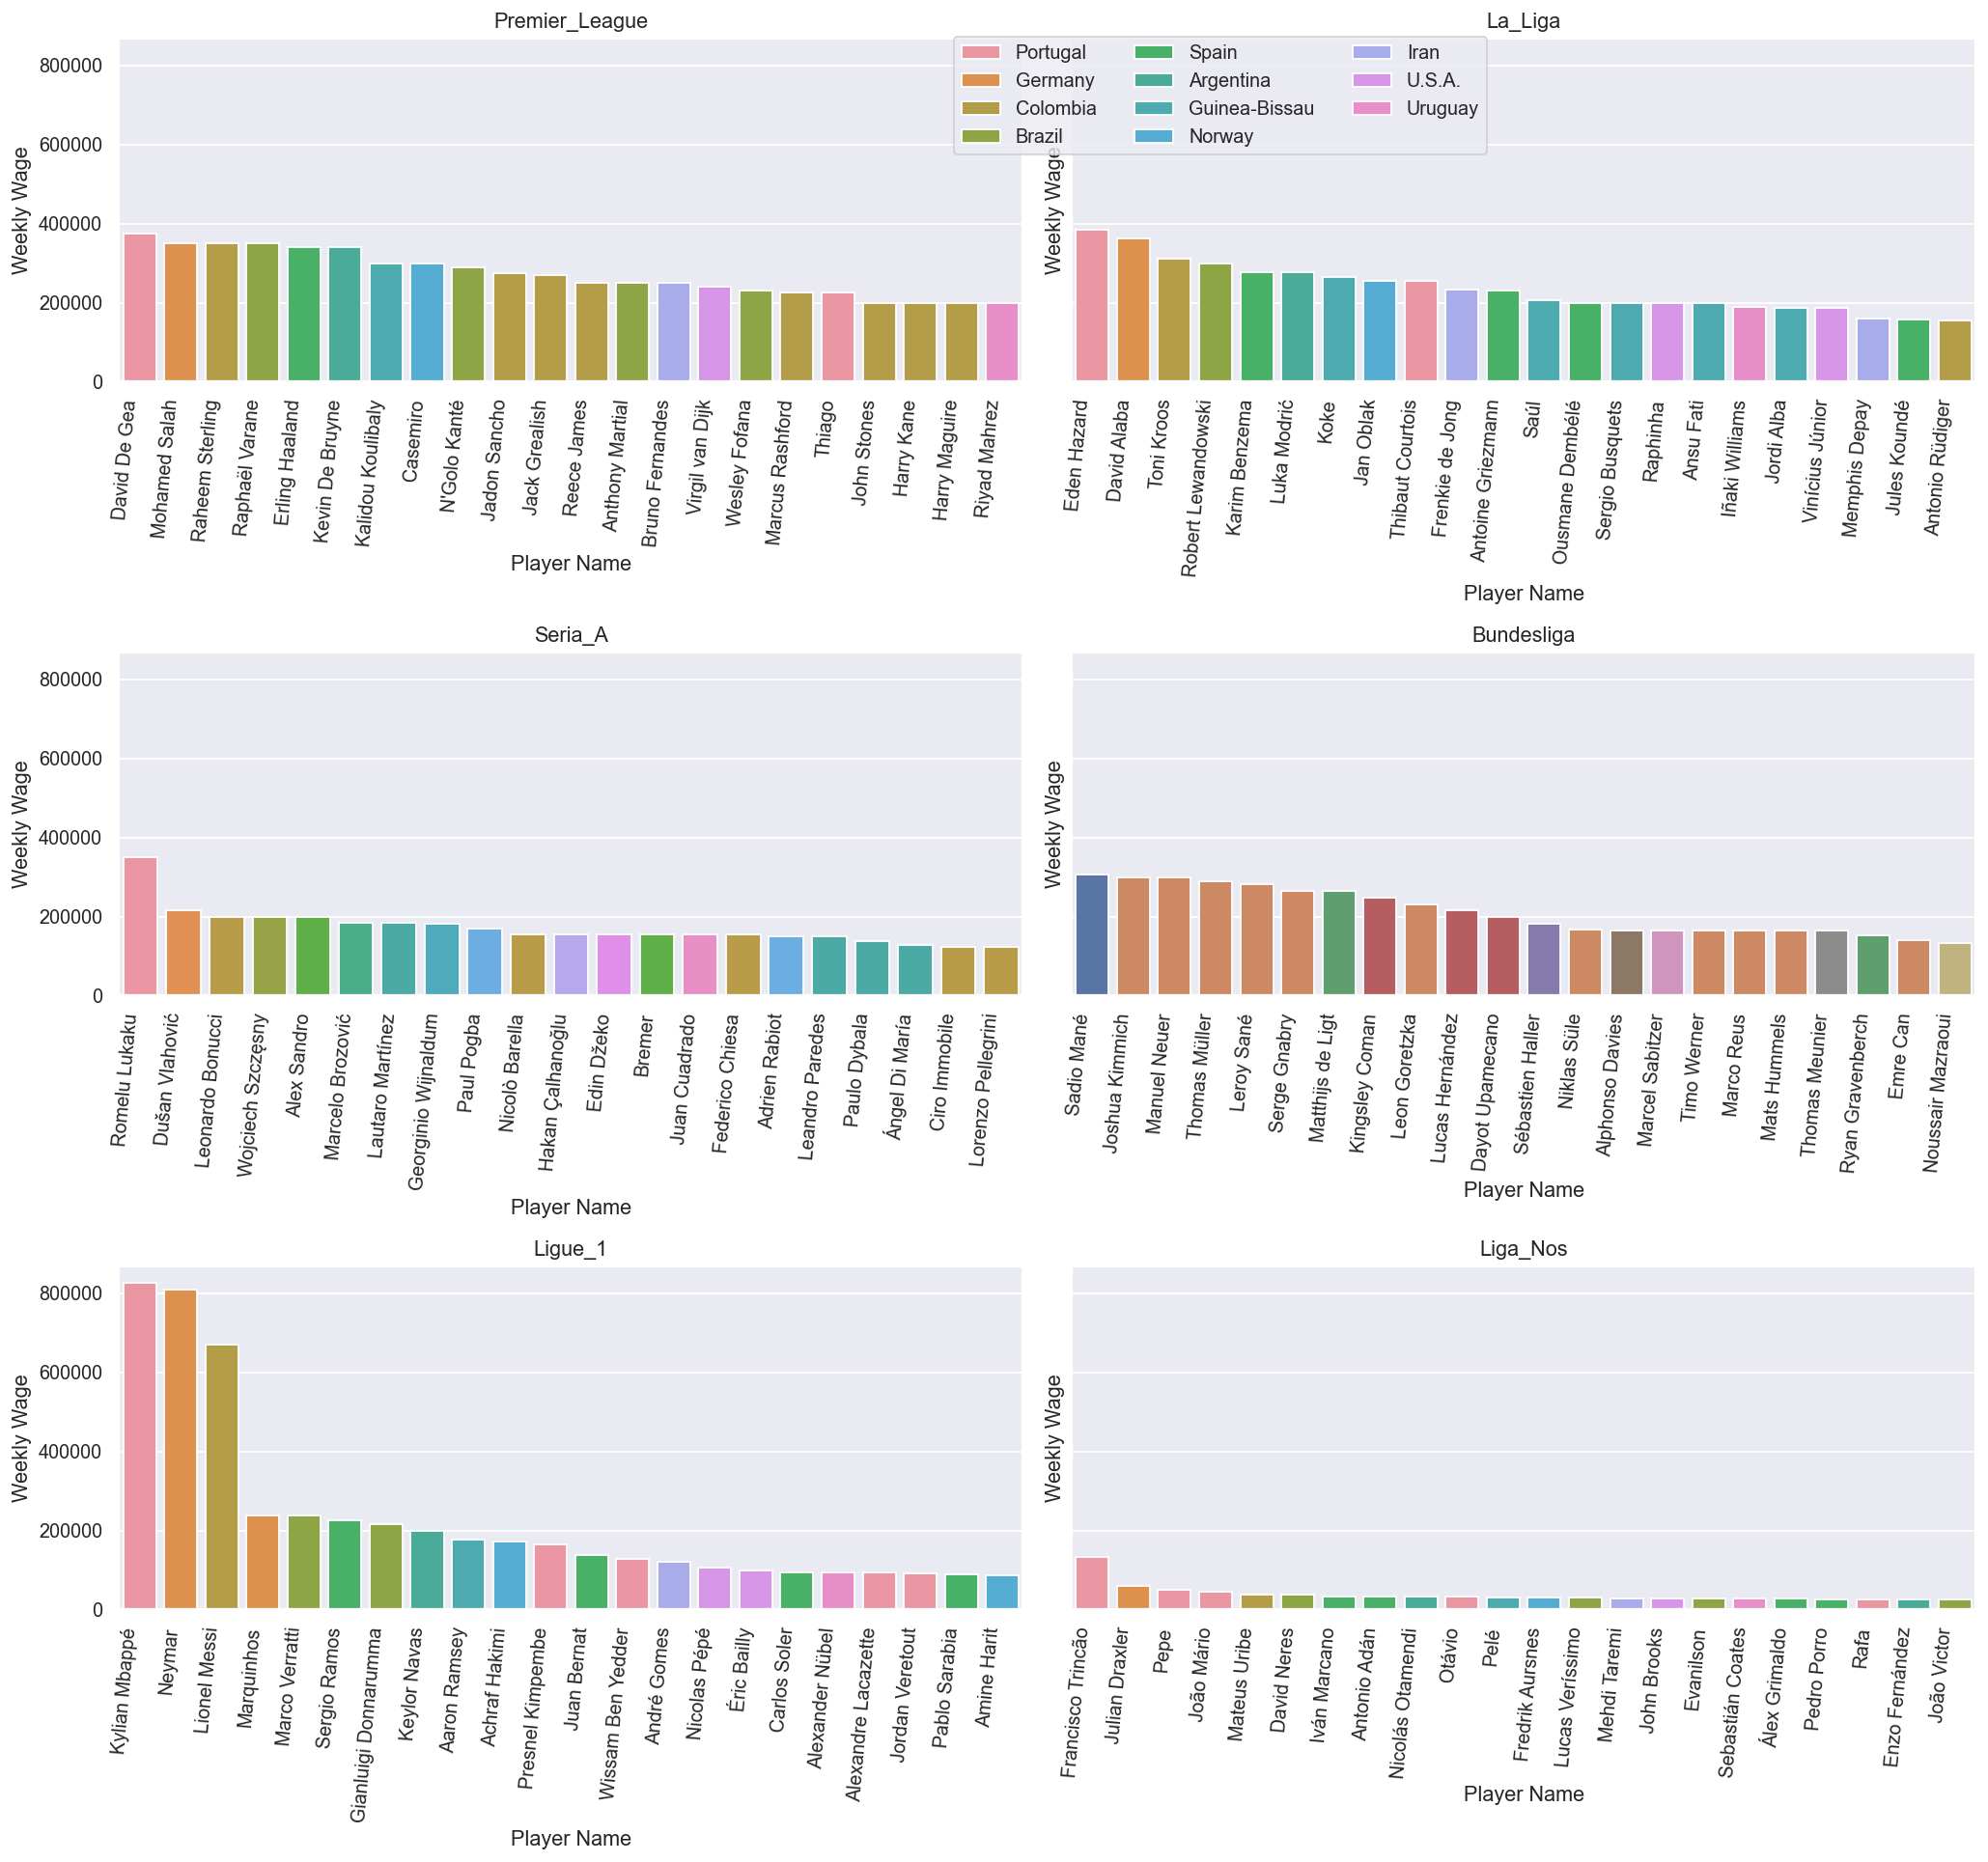

In [84]:

leagues = ["Premier_League", "La_Liga",  
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]

plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True, squeeze=False)

for d, i, j in zip(leagues, [0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]):
    df = LeagueDictFull[d].sort_values('Weekly Wage', ascending = 0).iloc[0:22]
    # sns.set(rc={'figure.figsize':(10.7,6.27)})
    
    axes[i, j].set_title(d)
    sns.barplot(x='Player Name', y='Weekly Wage', 
                          data=df, hue='Nationality', dodge=False,
                         ax = axes[i,j])
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), 
                              rotation=85, 
                             horizontalalignment='right')
    axes[i, j].get_legend().remove()
    
handles, labels = axes[i, j].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.75, 0.98))

plt.tight_layout()


In [15]:
LeagueDictFull_df = pd.concat(LeagueDictFull)
df = LeagueDictFull_df.sort_values('Weekly Wage', 
                                   ascending = 0).groupby("League").nth([i for i in range(22)]).reset_index()
df = df.sort_values('Weekly Wage', ascending = False)

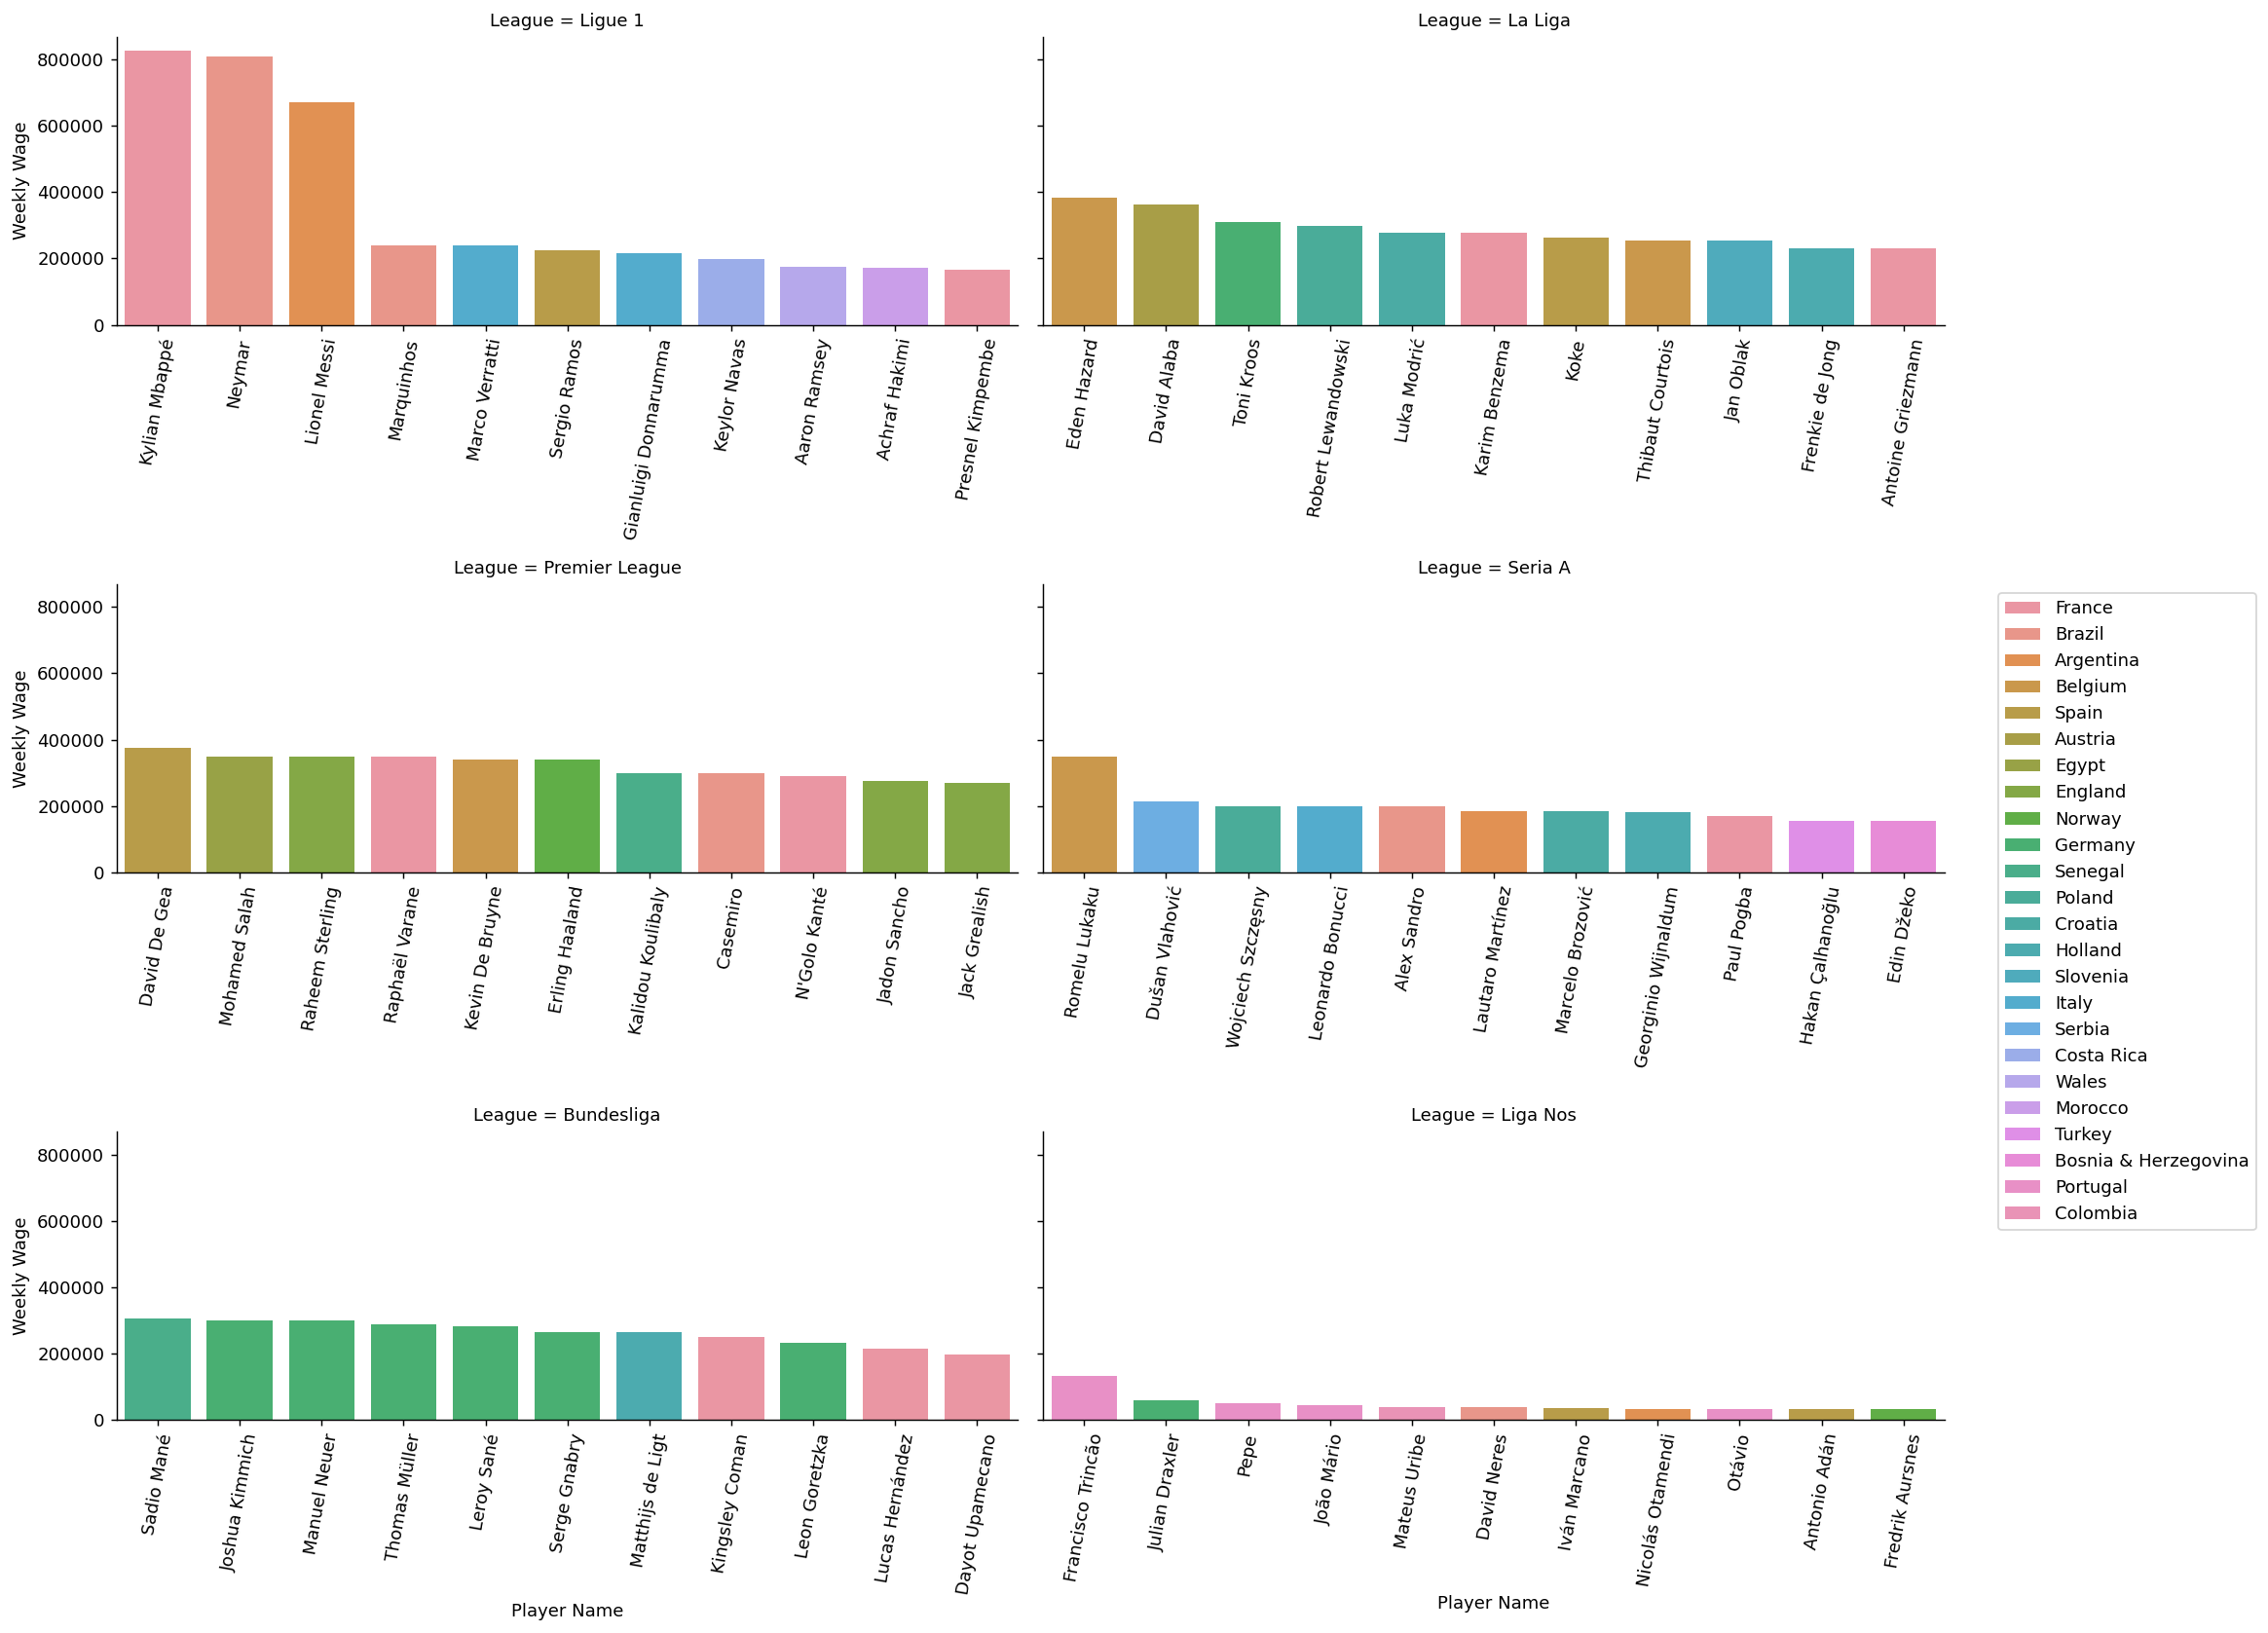

In [113]:
sns_National = sns.catplot(x='Player Name', 
                y='Weekly Wage',
                data=df, 
                kind="bar",
                hue='Nationality', 
                dodge=False,
                col = "League",
                col_wrap = 2,
                sharex= False,
                facet_kws = {'sharey':True,'sharex':False},
                legend=False)

sns_National.fig.set_size_inches(18,13)
sns_National.set_xticklabels(rotation=80)
#sns_National.fig.get_axes()[5].legend(loc='upper center', ncol=8)
sns_National.fig.get_axes()[3].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
#sns.move_legend(sns_National, "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()

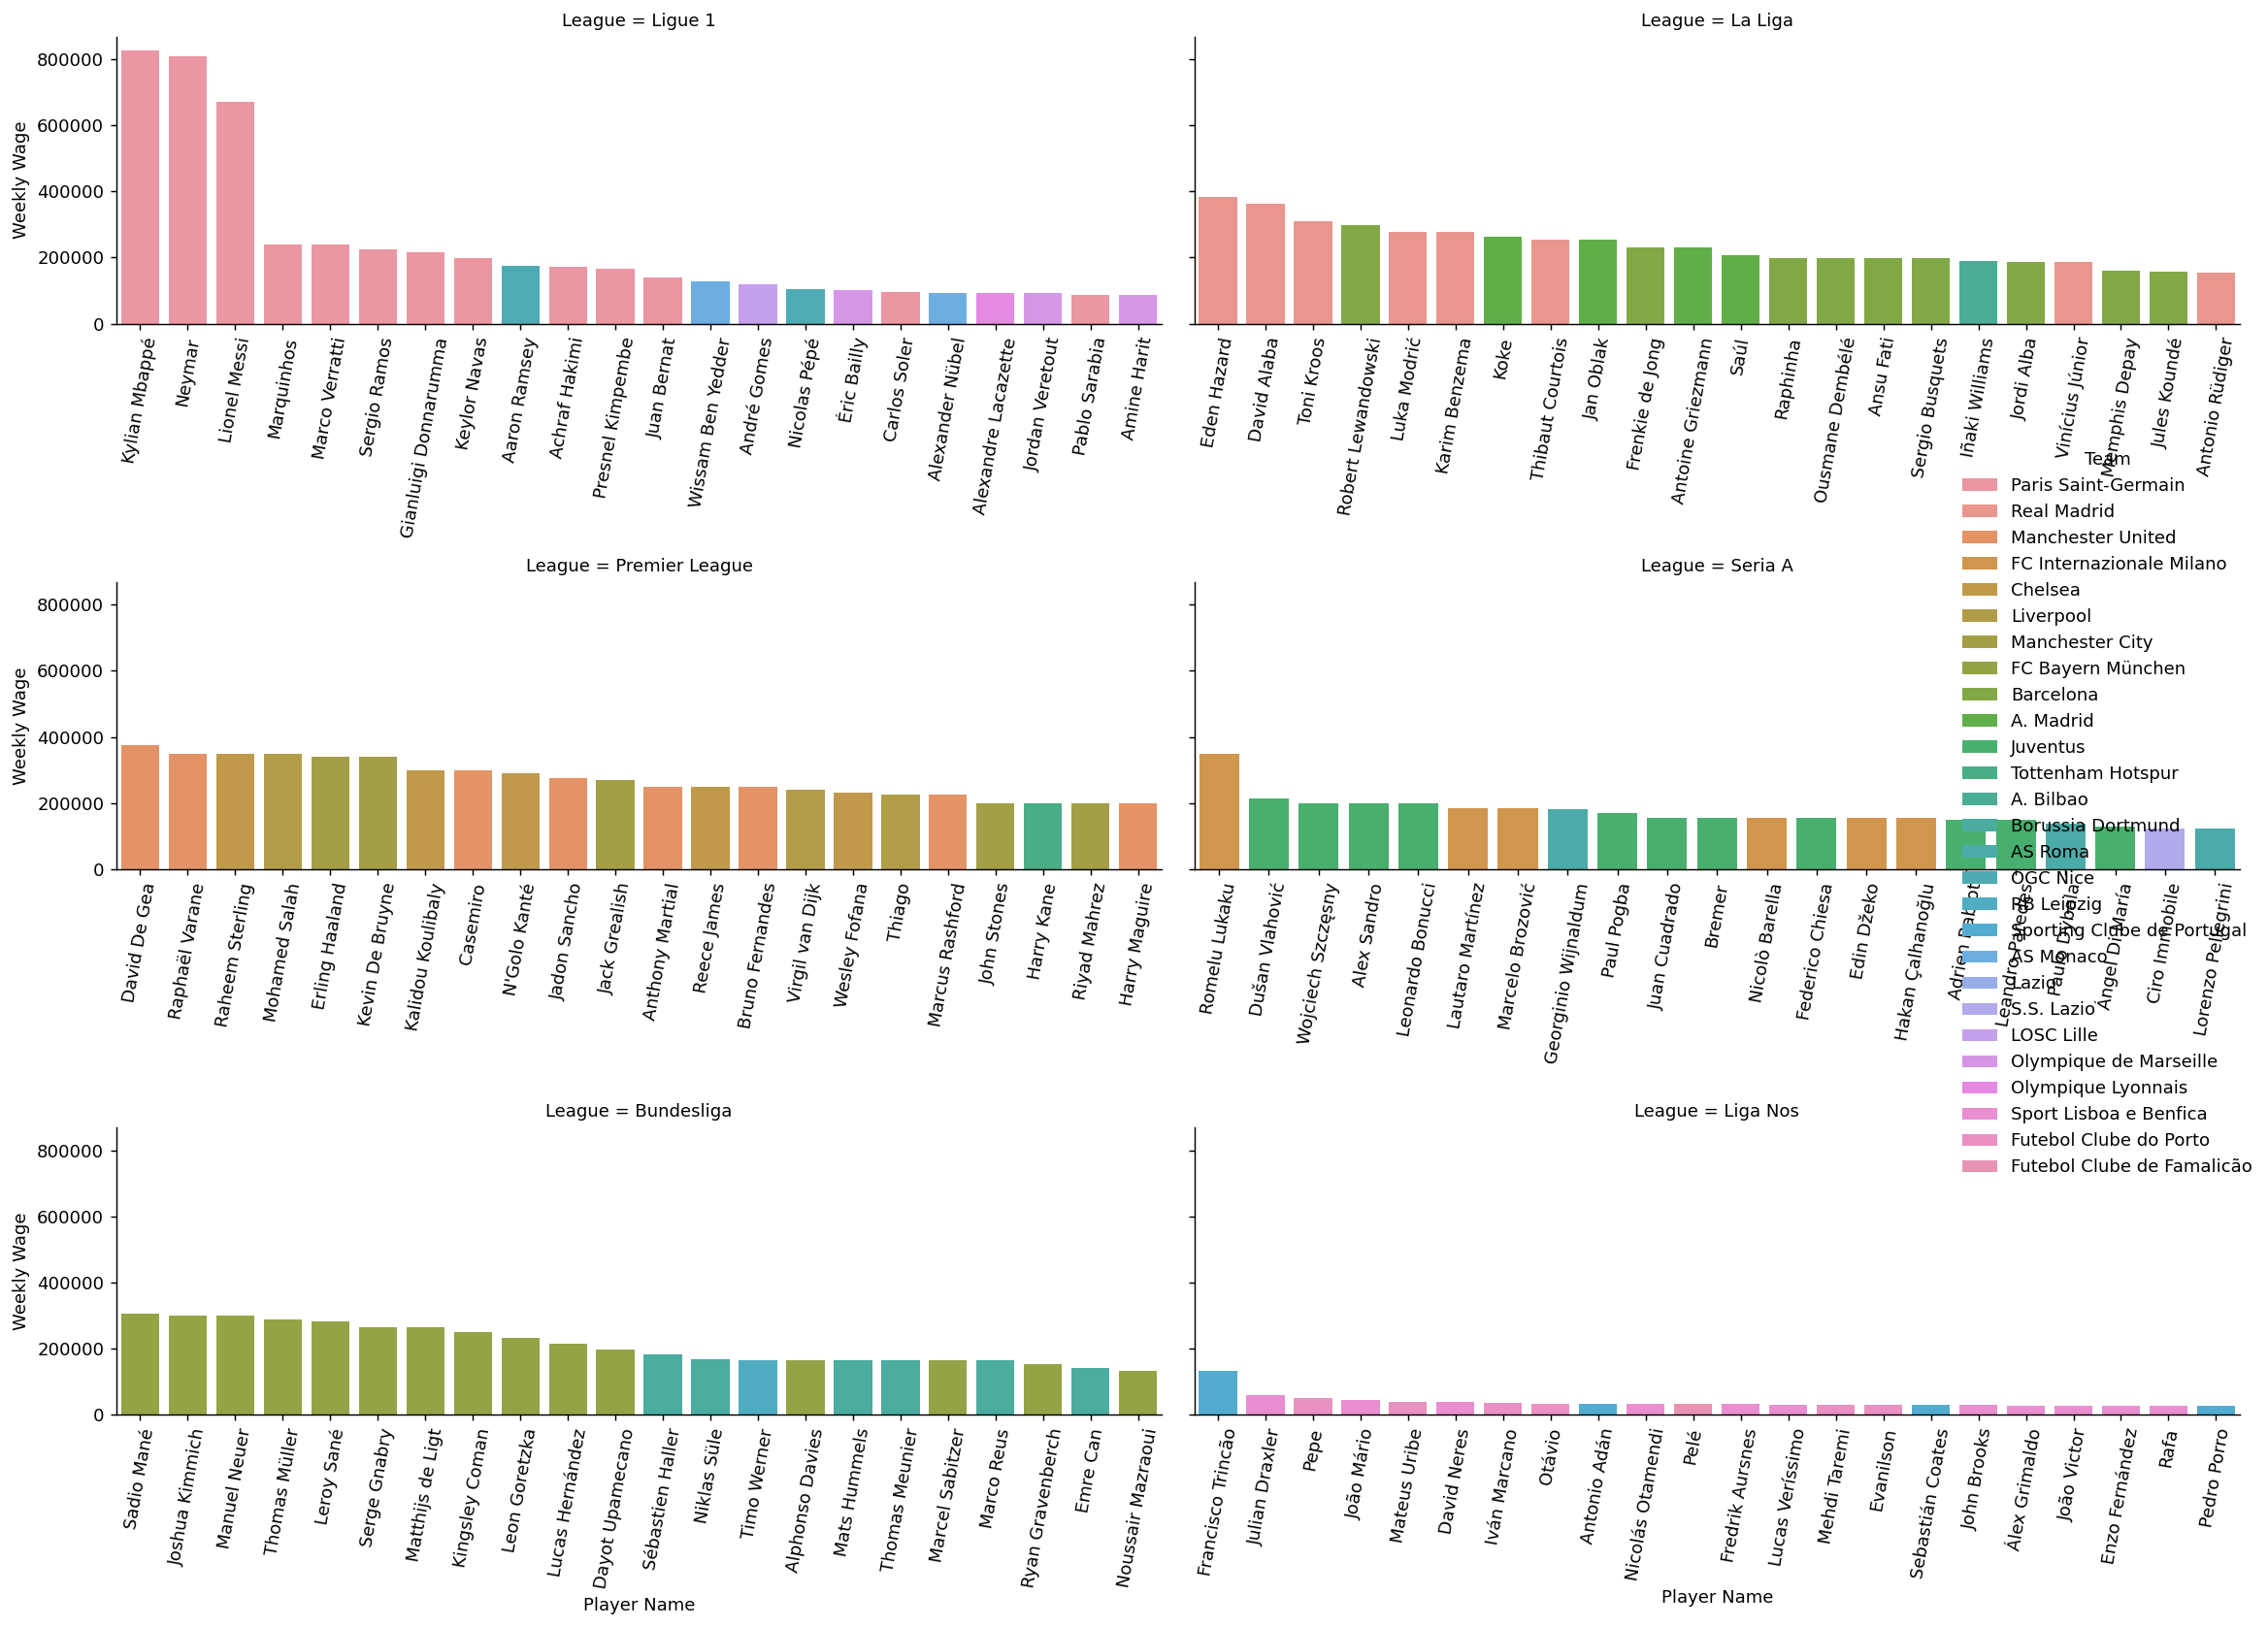

In [17]:
plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})

sns_Clubs = sns.catplot(x='Player Name', 
                y='Weekly Wage',
                data=df, 
                kind="bar",
                hue='Team', 
                dodge=False,
                col = "League",
                col_wrap = 2,
                sharex= False,
                facet_kws = {'sharey':False,'sharex':False},
                       legend = True)

sns_Clubs.fig.set_size_inches(18,13)
sns_Clubs.set_xticklabels(rotation=80)
#sns_National.fig.get_axes()[5].legend(loc='upper center', ncol=8)
#sns_Clubs.fig.get_axes()[3].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
#sns.move_legend(sns_National, "upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [124]:
df

,League,Player Name,Weekly Wage,Yearly Salary,Age,Team,Position,Nationality
38,Ligue 1,Kylian Mbappé,827000.0,43004000.0,23.0,Paris Saint-Germain,"AM RL, ST",France
41,Ligue 1,Neymar,810000.0,42120000.0,30.0,Paris Saint-Germain,"AM LC, F C",Brazil
42,Ligue 1,Lionel Messi,670000.0,34840000.0,35.0,Paris Saint-Germain,"AM RC, F C",Argentina
15,La Liga,Eden Hazard,384000.0,19968000.0,31.0,Real Madrid,AM RLC,Belgium
44,Premier League,David De Gea,375000.0,19500000.0,31.0,Manchester United,GK,Spain
...,...,...,...,...,...,...,...,...
30,Liga Nos,Iván Marcano,34000.0,1768000.0,35.0,Futebol Clube do Porto,D LC,Spain
31,Liga Nos,Nicolás Otamendi,32000.0,1664000.0,34.0,Sport Lisboa e Benfica,D C,Argentina
32,Liga Nos,Otávio,32000.0,1664000.0,27.0,Futebol Clube do Porto,AM RLC,Portugal
22,Liga Nos,Antonio Adán,32000.0,1664000.0,35.0,Sporting Clube de Portugal,GK,Spain


In [29]:
import pickle
with open('FootballWages/Output/file.pickle', 'wb') as f:
    pickle.dump(LeagueDictFull, f)

In [16]:
LeagueDictFull_df.Position = LeagueDictFull_df.Position.apply(lambda x:x.replace(",","").replace("/"," ").split(" "))
LeagueDictFull_df = LeagueDictFull_df.explode('Position').reset_index(drop=True)

In [13]:
LeagueDictFull_df.explode('Position').reset_index(drop=True)

,Player Name,Weekly Wage,Yearly Salary,Age,Team,Position,Nationality,League
0,Iñaki Williams,190000.0,9880000.0,28.0,A. Bilbao,AM,Ghana,La Liga
1,Iñaki Williams,190000.0,9880000.0,28.0,A. Bilbao,RLC,Ghana,La Liga
2,Iñaki Williams,190000.0,9880000.0,28.0,A. Bilbao,F,Ghana,La Liga
3,Iñaki Williams,190000.0,9880000.0,28.0,A. Bilbao,C,Ghana,La Liga
4,Raúl García,138000.0,7176000.0,36.0,A. Bilbao,AM,Spain,La Liga
...,...,...,...,...,...,...,...,...
7495,Miguel Maga,900.0,46800.0,19.0,Vitória Sport Clube,WB,Portugal,Liga Nos
7496,Miguel Maga,900.0,46800.0,19.0,Vitória Sport Clube,R,Portugal,Liga Nos
7497,Michel Dieu-Merci,730.0,37960.0,18.0,Vitória Sport Clube,ST,Canada,Liga Nos
7498,Roka,530.0,27560.0,18.0,Vitória Sport Clube,AM,Portugal,Liga Nos


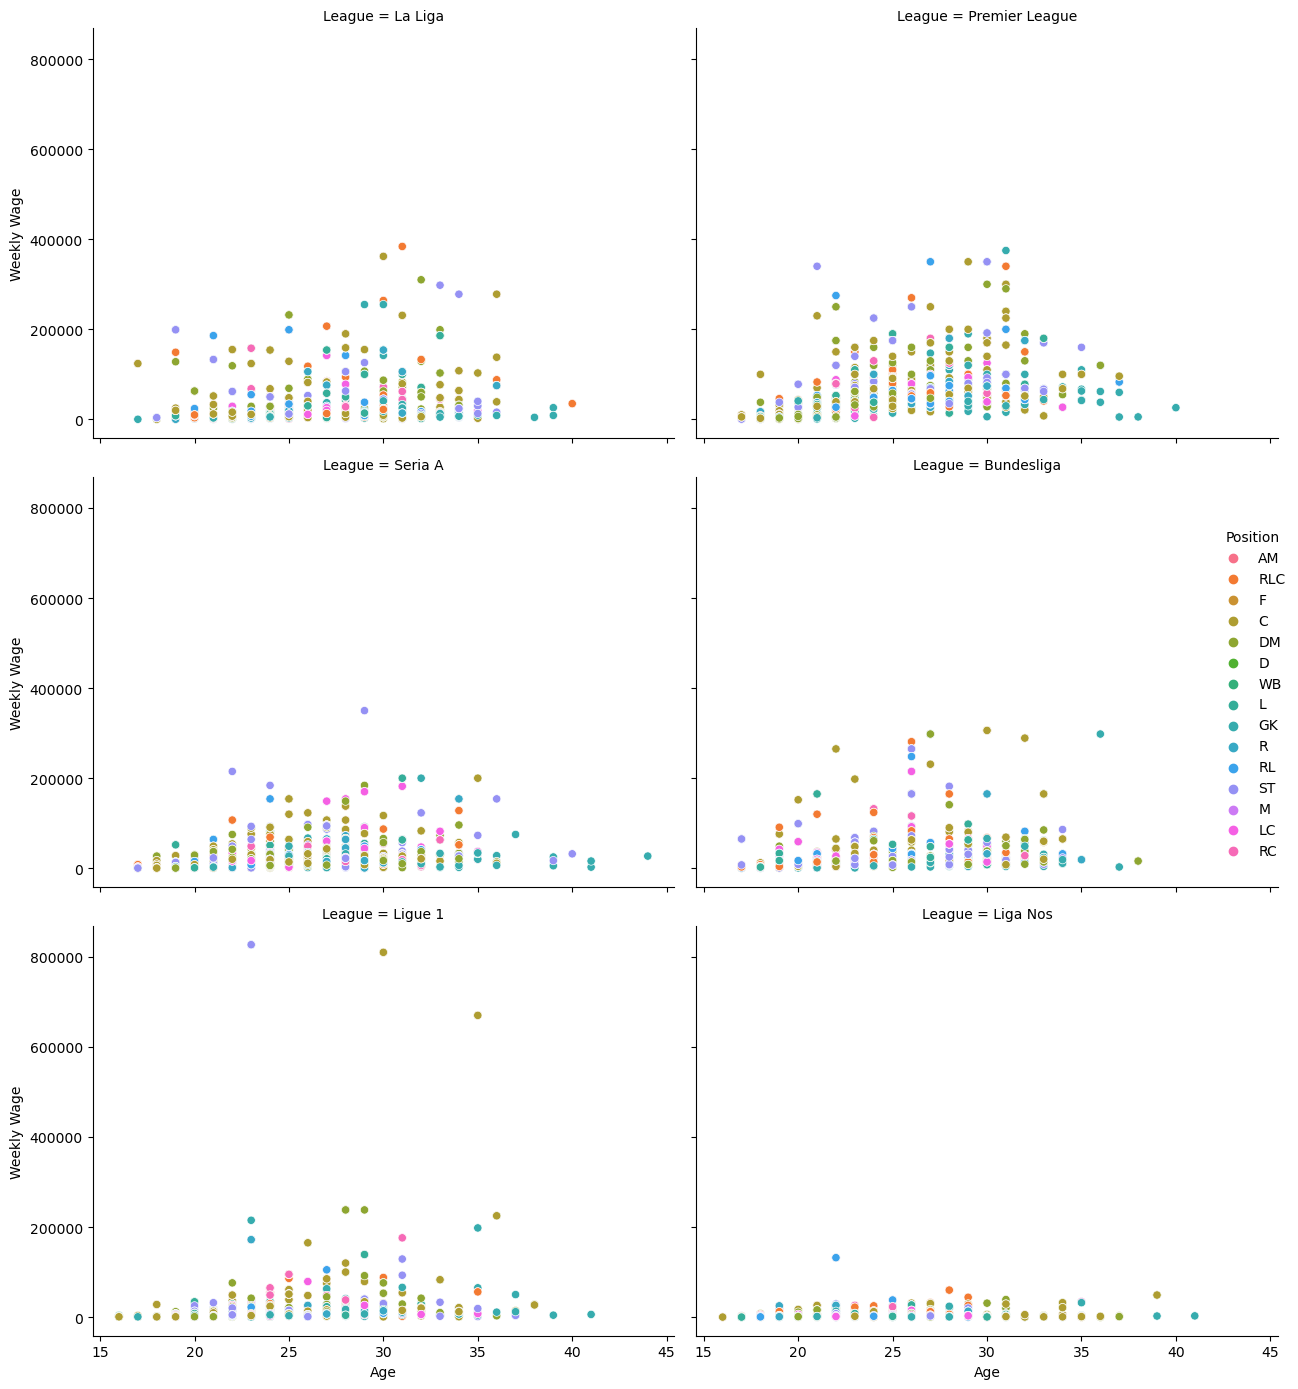

In [17]:
Age_Wage_plot = sns.relplot(data = LeagueDictFull_df,
                            y = "Weekly Wage", 
                            x = "Age",
                            col = "League",
                            hue = "Position",
                            col_wrap = 2)

Age_Wage_plot.fig.set_size_inches(13,14)
#plt.legend(loc='upper right')
plt.tight_layout()

In [21]:
LeagueDictFull_df[LeagueDictFull_df["Player Name"].isin(["Lionel Messi","Neymar", "Kylian Mbappé"])]

,Player Name,Weekly Wage,Yearly Salary,Age,Team,Position,Nationality,League
5843,Kylian Mbappé,827000.0,43004000.0,23.0,Paris Saint-Germain,AM,France,Ligue 1
5844,Kylian Mbappé,827000.0,43004000.0,23.0,Paris Saint-Germain,RL,France,Ligue 1
5845,Kylian Mbappé,827000.0,43004000.0,23.0,Paris Saint-Germain,ST,France,Ligue 1
5846,Neymar,810000.0,42120000.0,30.0,Paris Saint-Germain,AM,Brazil,Ligue 1
5847,Neymar,810000.0,42120000.0,30.0,Paris Saint-Germain,LC,Brazil,Ligue 1
5848,Neymar,810000.0,42120000.0,30.0,Paris Saint-Germain,F,Brazil,Ligue 1
5849,Neymar,810000.0,42120000.0,30.0,Paris Saint-Germain,C,Brazil,Ligue 1
5850,Lionel Messi,670000.0,34840000.0,35.0,Paris Saint-Germain,AM,Argentina,Ligue 1
5851,Lionel Messi,670000.0,34840000.0,35.0,Paris Saint-Germain,RC,Argentina,Ligue 1
5852,Lionel Messi,670000.0,34840000.0,35.0,Paris Saint-Germain,F,Argentina,Ligue 1


In [9]:
LeagueDictFull_df

Player Name  Weekly Wage  Yearly Salary   Age  \
La_Liga  0       Iñaki Williams     190000.0      9880000.0  28.0   
         1          Raúl García     138000.0      7176000.0  36.0   
         2        Ander Herrera     129000.0      6708000.0  32.0   
         3       Íñigo Martínez      83000.0      4316000.0  31.0   
         4                 Yuri      71000.0      3692000.0  32.0   
...                         ...          ...            ...   ...   
Liga_Nos 581          Zé Carlos       1000.0        52000.0  20.0   
         582       Noah Saviolo        920.0        47840.0  18.0   
         583        Miguel Maga        900.0        46800.0  19.0   
         584  Michel Dieu-Merci        730.0        37960.0  18.0   
         585               Roka        530.0        27560.0  18.0   

                             Team         Position Nationality    League  
La_Liga  0              A. Bilbao  [AM, RLC, F, C]       Ghana   La Liga  
         1              A. Bilbao       [AM, F, C]       Spain   La Liga  
         2              A. Bilbao             [DM]       Spain   La Liga  
         3              A. Bilbao           [D, C]       Spain   La Liga  
         4              A. Bilbao       [D, WB, L]       Spain   La Liga  
...                           ...              ...         ...       ...  
Liga_Nos 581  Vitória Sport Clube   [D, WB, R, DM]    Portugal  Liga Nos  
         582  Vitória Sport Clube     [AM, RL, ST]     Belgium  Liga Nos  
         583  Vitória Sport Clube       [D, WB, R]    Portugal  Liga Nos  
         584  Vitória Sport Clube             [ST]      Canada  Liga Nos  
         585  Vitória Sport Clube         [AM, RL]    Portugal  Liga Nos  

[3458 rows x 8 columns]

In [68]:
LeagueDictFull_df.Position.unique()

array(['AM', 'RLC', 'F', 'C', 'DM', 'D', 'WB', 'L', 'GK', 'R', 'RL', 'ST',
       'M', 'LC', 'RC'], dtype=object)